In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

In [11]:
# Import data from the listed url
train = np.loadtxt(np.DataSource().open('http://www.amlbook.com/data/zip/features.train'), dtype=float)
test = np.loadtxt(np.DataSource().open('http://www.amlbook.com/data/zip/features.test'), dtype=float)

In [12]:
y_train, x_train = train[:, 0], train[:, 1:]
y_test, x_test = test[:, 0], test[:, 1:]

In [13]:
clf = SVC()
clf.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [14]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

In [15]:
def plot_contours(clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = plt.contourf(xx, yy, Z, **params)
    return out

In [16]:
X0, X1 = x_train[:, 0], x_train[:, 1]
xx, yy = make_meshgrid(X0, X1)

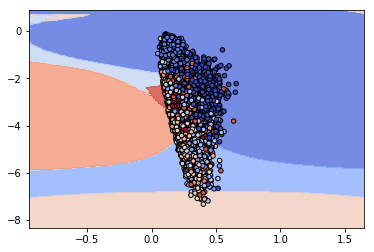

In [22]:
plot_contours(clf, xx, yy,
              cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.show()